In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. From a guassian population distribution, take samples of various sizes like 2,16,36,100 and plot the sampling distribution and compare the theoretical values of std dev to the stimulated values.
#  sampling distribution
def simulate_sampling_distribution(population, sample_size, num_samples):
    sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]
    return sample_means

np.random.seed(42)
population_size = 1000000
num_samples = 10000
sample_sizes = [2, 16, 36, 100]

In [3]:
# Gaussian Population Distribution
gaussian_population = np.random.normal(0, 1, population_size)


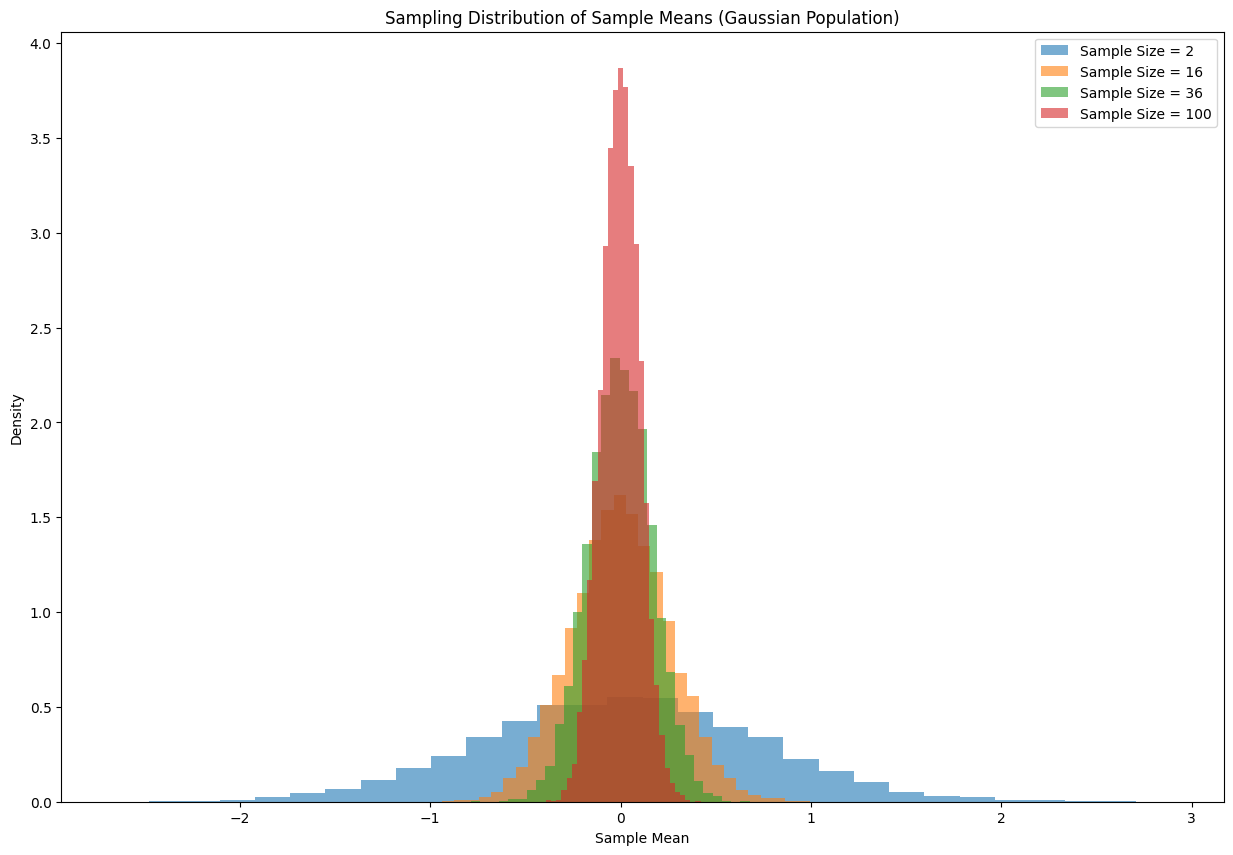

In [4]:
# Plotting the sampling distributions for Gaussian Population
plt.figure(figsize=(15, 10))

for size in sample_sizes:
    sample_means = simulate_sampling_distribution(gaussian_population, size, num_samples)
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, label=f'Sample Size = {size}')

plt.title('Sampling Distribution of Sample Means (Gaussian Population)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

In [5]:
# Theoretical std dev
theoretical_stds = [1 / np.sqrt(size) for size in sample_sizes]

In [6]:
# Simulated std dev
simulated_stds = [np.std(simulate_sampling_distribution(gaussian_population, size, num_samples)) for size in sample_sizes]

In [7]:
# Comparing theoretical and simulated std devs
for i, size in enumerate(sample_sizes):
    print(f"Sample Size: {size}, Theoretical Std Dev: {theoretical_stds[i]:.4f}, Simulated Std Dev: {simulated_stds[i]:.4f}")

Sample Size: 2, Theoretical Std Dev: 0.7071, Simulated Std Dev: 0.7035
Sample Size: 16, Theoretical Std Dev: 0.2500, Simulated Std Dev: 0.2487
Sample Size: 36, Theoretical Std Dev: 0.1667, Simulated Std Dev: 0.1690
Sample Size: 100, Theoretical Std Dev: 0.1000, Simulated Std Dev: 0.1011


In [8]:
# 2. From a skewed distrbution (pareto, exponential, etc), repeat the above experiement.
exponential_population = np.random.exponential(1, population_size)


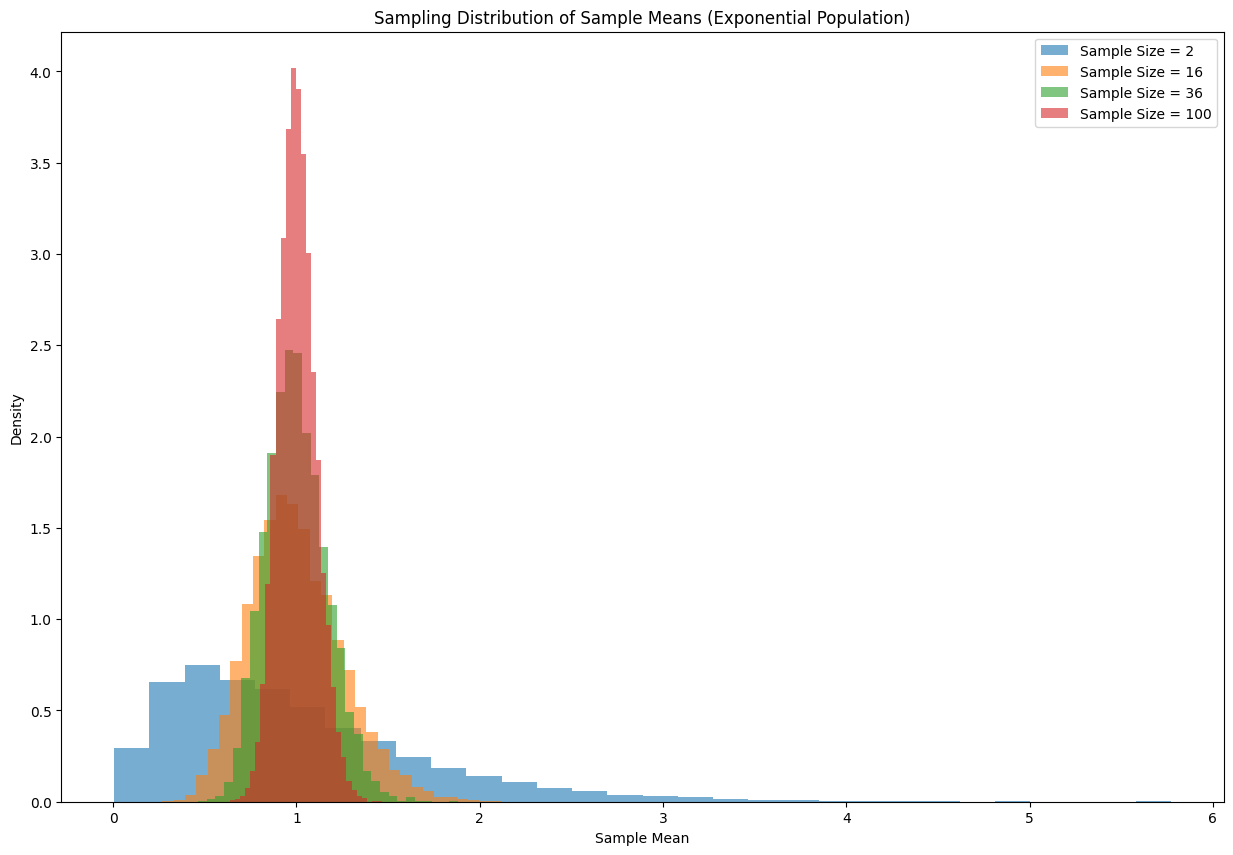

In [9]:
# Plotting the sampling distributions for Exponential Population
plt.figure(figsize=(15, 10))

for size in sample_sizes:
    sample_means = simulate_sampling_distribution(exponential_population, size, num_samples)
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, label=f'Sample Size = {size}')


plt.title('Sampling Distribution of Sample Means (Exponential Population)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

In [10]:
# Theoretical std devs for Exponential Distribution
theoretical_stds_exp = [1 / np.sqrt(size) for size in sample_sizes]

# Simulated std devs for Exponential Distribution
simulated_stds_exp = [np.std(simulate_sampling_distribution(exponential_population, size, num_samples)) for size in sample_sizes]


In [11]:
# Comparision
for size, theoretical, simulated in zip(sample_sizes, theoretical_stds_exp, simulated_stds_exp):
    print(f"Sample Size: {size}, Theoretical Std Dev: {theoretical:.4f}, Simulated Std Dev: {simulated:.4f}")

Sample Size: 2, Theoretical Std Dev: 0.7071, Simulated Std Dev: 0.7075
Sample Size: 16, Theoretical Std Dev: 0.2500, Simulated Std Dev: 0.2522
Sample Size: 36, Theoretical Std Dev: 0.1667, Simulated Std Dev: 0.1691
Sample Size: 100, Theoretical Std Dev: 0.1000, Simulated Std Dev: 0.1013


In [18]:
# 3. For population distrbutions of different skews(1,2,3,4,5), check where does the CLT kick in, i.e. for what size of the sample
def simulate_sampling_distribution(population, sample_size, num_samples):
    sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]
    return sample_means

In [19]:
np.random.seed(42)
population_size = 1000000
num_samples = 10000
sample_sizes = range(2, 51, 5)

In [20]:
skewness_levels = [1, 2, 3, 4, 5]

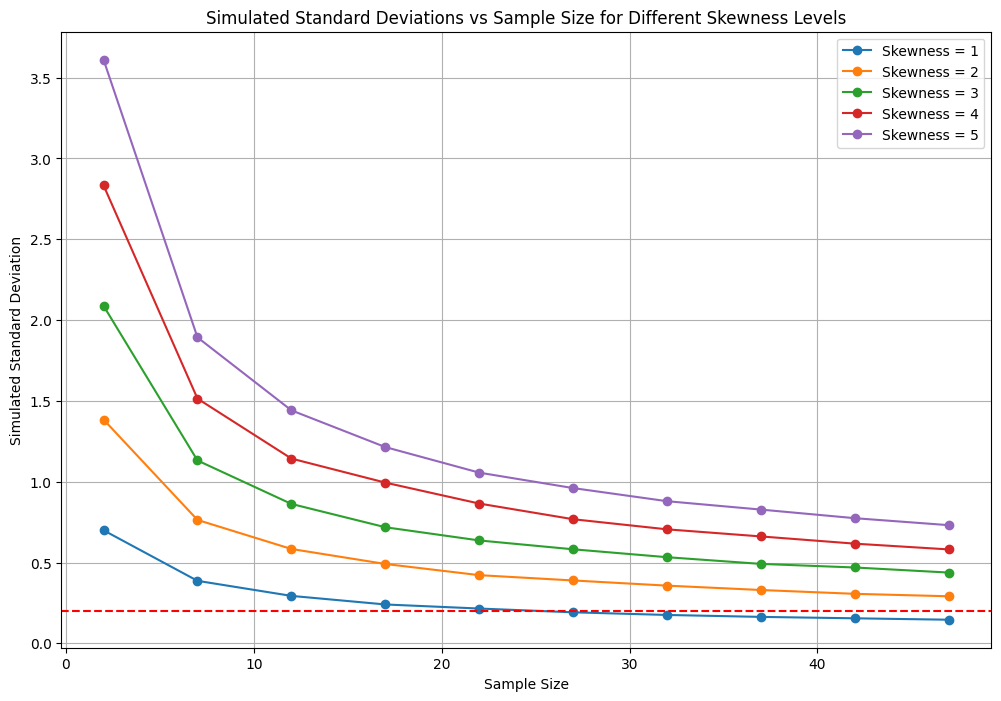

In [24]:
plt.figure(figsize=(12, 8))

for skewness in skewness_levels:
    skewed_population = np.random.exponential(scale=skewness, size=population_size)

    simulated_stds = [np.std(simulate_sampling_distribution(skewed_population, size, num_samples)) for size in sample_sizes]

    plt.plot(sample_sizes, simulated_stds, marker='o', label=f'Skewness = {skewness}')

plt.title('Simulated Standard Deviations of Sample Size for Different Skewness Levels')
plt.xlabel('Sample Size')
plt.ylabel('Simulated Standard Deviation')
plt.legend()
plt.grid(True)
plt.axhline(y=0.2, color='r', linestyle= '--')
plt.show()

In [29]:
# 4. In the simulated sampling distribution check if the empirical rule of 68.3,95.4 and 99.7 percentage of data lie between 1 , 2 and 3 std deviations. from the mean. Represent these points on the graph as well
plt.figure(figsize=(18, 12))
results = pd.DataFrame(columns=['Sample Size', 'Theoretical Std Dev', 'Simulated Std Dev (Gaussian)'])



<Figure size 1800x1200 with 0 Axes>

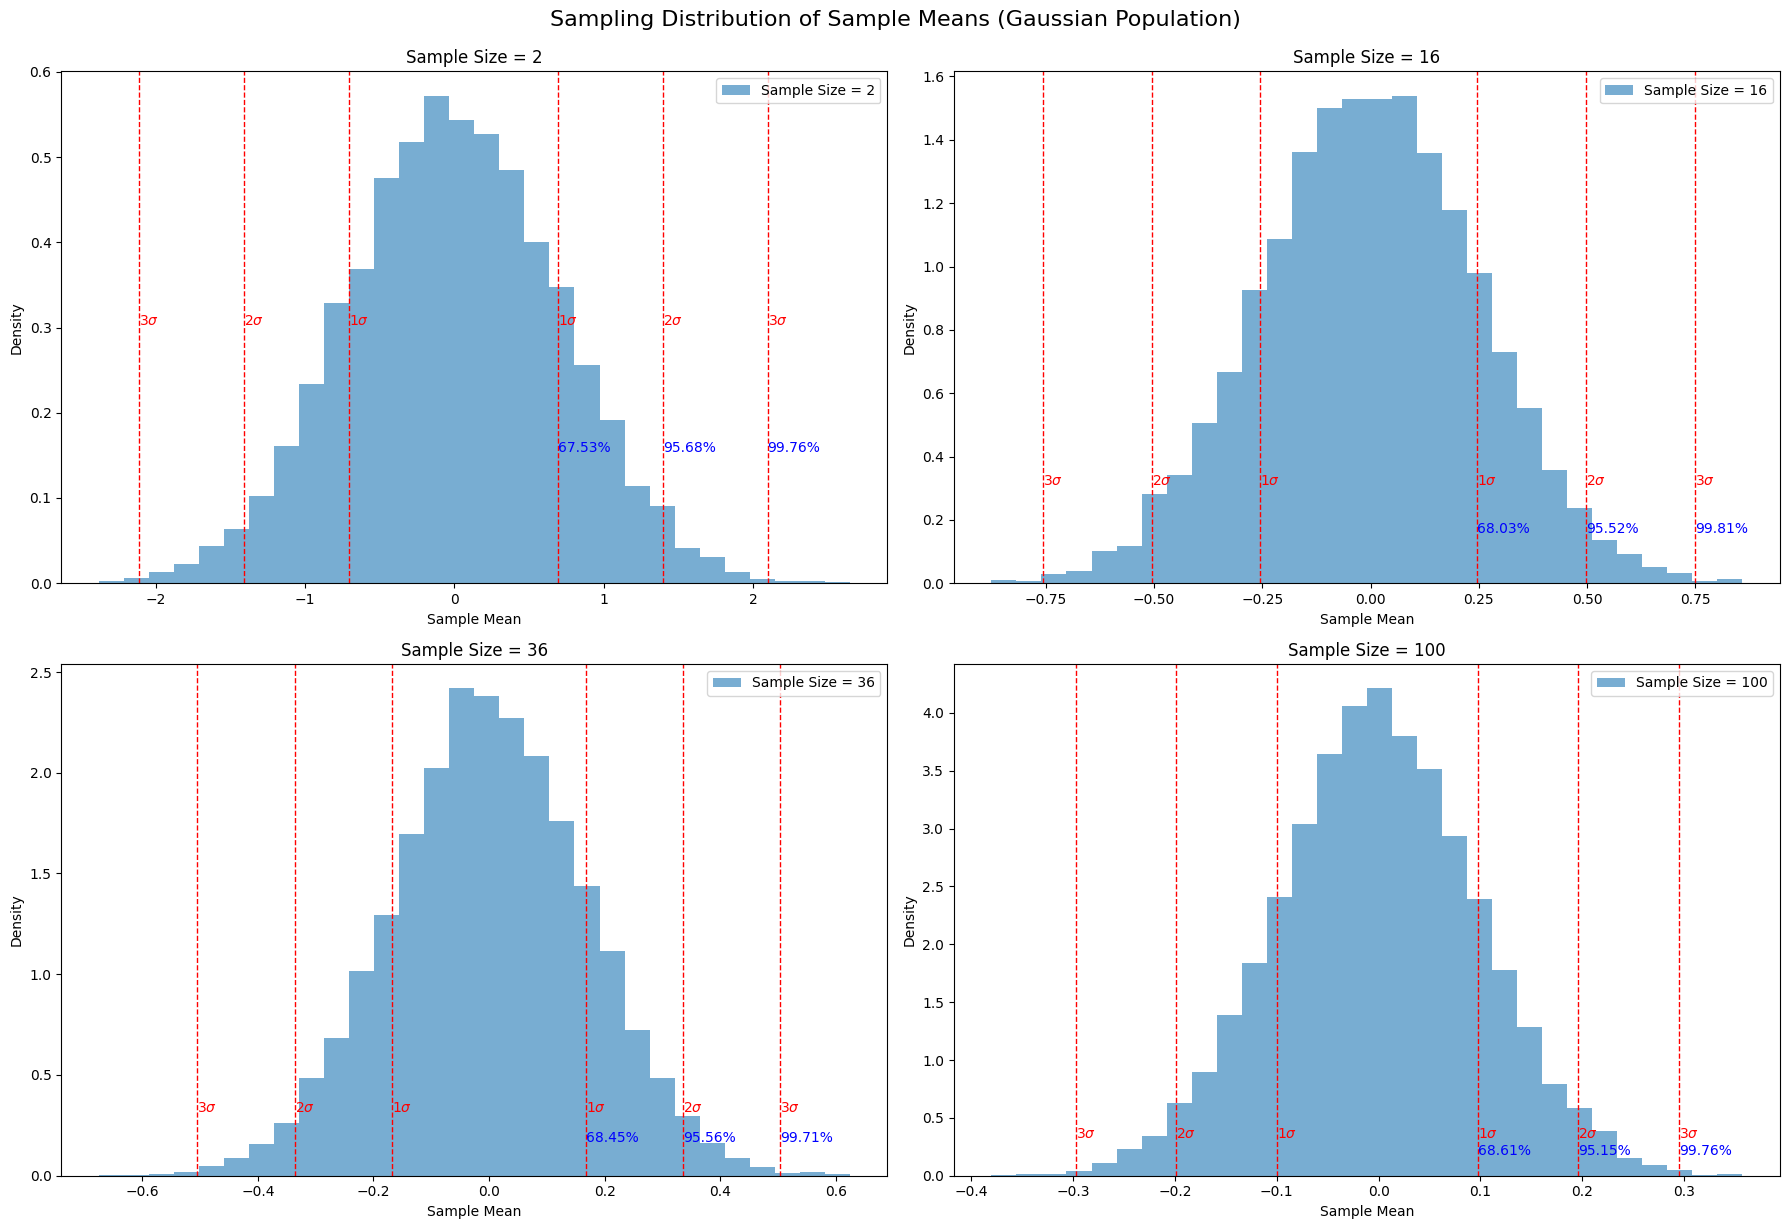

In [38]:
plt.figure(figsize=(18, 12))


for i in range(4):
    size = sample_sizes[i]
    sample_means = simulate_sampling_distribution(gaussian_population, size, num_samples)
    
    plt.subplot(2, 2, i + 1)
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, label=f'Sample Size = {size}')

    # Calculate mean and standard deviation of sample means
    mean_sample_means = np.mean(sample_means)
    std_sample_means = np.std(sample_means)

    # empirical rule lines
    for std_devs in range(1, 4):
        lower_bound = mean_sample_means - std_devs * std_sample_means
        upper_bound = mean_sample_means + std_devs * std_sample_means
        plt.axvline(lower_bound, color='r', linestyle='--', linewidth=1)
        plt.axvline(upper_bound, color='r', linestyle='--', linewidth=1)
        plt.text(lower_bound, 0.3, f'{std_devs}$\sigma$', color='r', verticalalignment='bottom')
        plt.text(upper_bound, 0.3, f'{std_devs}$\sigma$', color='r', verticalalignment='bottom')

        # Calculate percentage of data points within each standard deviation
        within_std_dev = np.mean((sample_means >= lower_bound) & (sample_means <= upper_bound)) * 100
        plt.text(mean_sample_means + std_devs * std_sample_means, 0.15, f'{within_std_dev:.2f}%', color='b', verticalalignment='bottom')
    


    plt.title(f'Sample Size = {size}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.suptitle('Sampling Distribution of Sample Means (Gaussian Population)', y=1.02, fontsize=16)
plt.show()

